# Ensemble Learning
California Housing dataset에 bagging을 적용한다.

## dataset 업로드

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

df = load_housing_data()
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 결측치 확인 및 처리

In [ ]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


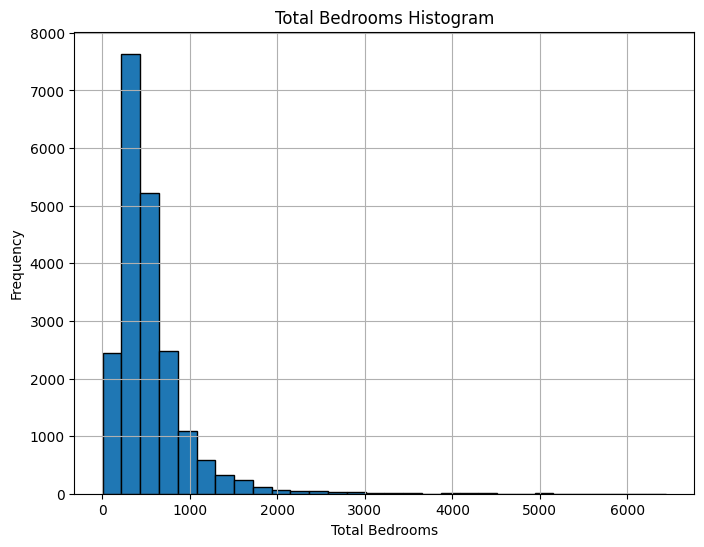

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['total_bedrooms'], bins=30, edgecolor='k')
plt.title('Total Bedrooms Histogram')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

total_bedrooms의 그래프를 확인한 결과, 데이터가 중앙값을 기준으로 밀접하게 분포되어 있으므로, 중앙값으로 결측치를 대체한다.

In [ ]:
print("중앙값",df['total_bedrooms'].median(), "으로 결측치 대체")
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
print(df.isnull().sum())

중앙값 435.0 으로 결측치 대체
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Classification 기준 설정
housing dataset의 특성을 살펴보면, ocean_proximity(해안 근접도)만 수치형 데이터가 아닌 범주형 데이터이기 때문에, ocean_proximity를 기준으로 데이터를 분류하는 모델을 학습시키고자 한다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

island는 표본이 너무 적어 분류가 어렵다고 판단하여 분류 대상에서 제외했다.

In [ ]:
print("제거될 행")
print(df[df['ocean_proximity'] == 'ISLAND'])
df = df[df['ocean_proximity'] != 'ISLAND']

제거될 행
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8315    -118.33     33.34                52.0       2359.0           591.0   
8316    -118.32     33.33                52.0       2127.0           512.0   
8317    -118.32     33.34                52.0        996.0           264.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0         2.1579            450000.0   
8315      1100.0       431.0         2.8333            414700.0   
8316       733.0       288.0         3.3906            300000.0   
8317       341.0       160.0         2.7361            450000.0   
8318       422.0       173.0         2.6042            287500.0   

     ocean_proximity  
8314          ISLAND  
8315          ISLAND  
8316          ISLAND  
8317          ISLAND  
8318   

In [ ]:
print(df.shape)
df["ocean_proximity"].value_counts()

(20635, 10)


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

## 모델 학습

In [ ]:
y = df.ocean_proximity
y = y.map({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3})
df.drop('ocean_proximity',inplace=True,axis=1)
X = df

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Base Model 설정 (Decision Tree 사용)
base_model = DecisionTreeClassifier()

# Bagging Classifier 설정
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=10)

# 모델 훈련
bagging_clf.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9779500848073661


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1847
           1       0.99      0.99      0.99      1303
           2       0.96      0.94      0.95       517
           3       0.99      0.98      0.98       460

    accuracy                           0.98      4127
   macro avg       0.98      0.97      0.97      4127
weighted avg       0.98      0.98      0.98      4127


Confusion Matrix:
 [[1815   19   13    0]
 [  18 1285    0    0]
 [  27    0  484    6]
 [   2    0    6  452]]


## 새로운 데이터 예측

In [ ]:
# 새로운 데이터 예측
new_data = pd.DataFrame({'longitude': [-118.32],
                         'latitude': [33.35],
                         'housing_median_age': [27.0],
                         'total_rooms': [1675.0],
                         'total_bedrooms': [521.0],
                         'population': [744.0],
                         'households': [331.0],
                         'median_income': [2.1579],
                         'median_house_value': [450000.0]})
new_data_pred = bagging_clf.predict(new_data)

# 예측 결과 출력
print('new data')
print(new_data)
print("새로운 데이터 예측 결과")
{'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3}
if (new_data_pred==0):
  print('<1H OCEAN')
elif (new_data_pred==1):
  print('INLAND')
elif (new_data_pred==2):
  print('NEAR OCEAN')
else:
  print('NEAR BAY')

new data
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.32     33.35                27.0       1675.0           521.0   

   population  households  median_income  median_house_value  
0       744.0       331.0         2.1579            450000.0  
새로운 데이터 예측 결과
NEAR OCEAN
